<a href="https://www.kaggle.com/code/kursatdinc/a-b-test?scriptVersionId=181272932" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# AB Testing - Comparing the Conversion of Bidding Methods

## Business Problem

Facebook has recently introduced a new method called "maximum bidding" a new type of bidding as an alternative to bidding introduced "average bidding".

One of our customers, xyz.com, decided to test this new feature and wants to do an A/B test to see if average bidding brings more conversions than maximum bidding.

A/B testing has been going on for 1 month and xyz.com now expects you to analyze the results of this A/B test. The ultimate success criterion for xyz.com is Purchase. Therefore, the focus should be on the Purchase metric for statistical testing.


## Dataset Story

This data set, which includes a company’s website information, includes information such as the number of advertisements that users see and click on, as well as earnings information obtained from it. There are two separate data sets: Control and Test group. These data sets are located on separate sheets of the ab_testing.xlsx excel. Maximum Bidding was applied to the control group and Average Bidding was applied to the test group.

## Variables

* 4 Variable
* 40 Observation

----

* Impression : Number of Ad Views
* Click : Number of Clicks on the Ad Displayed
* Purchase : Number of Products Purchased After Ads Clicked
* Earning : Earnings After Purchased Products

## IMPORTINGS & SETTINGS

In [1]:
# Importings

import pandas as pd
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
control = pd.read_excel("/kaggle/input/ab-testing/ab_testing.xlsx", sheet_name="Control Group")
test = pd.read_excel("/kaggle/input/ab-testing/ab_testing.xlsx", sheet_name="Test Group")

In [3]:
control.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [4]:
control.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,101711.44907,20302.15786,45475.94296,85726.69035,99790.70108,115212.81654,147539.33633
Click,40.00000,5100.65737,1329.98550,2189.75316,4124.30413,5001.22060,5923.80360,7959.12507
Purchase,40.00000,550.89406,134.10820,267.02894,470.09553,531.20631,637.95709,801.79502
Earning,40.00000,1908.56830,302.91778,1253.98952,1685.84720,1975.16052,2119.80278,2497.29522


In [5]:
test.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


In [6]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,120512.41176,18807.44871,79033.83492,112691.97077,119291.30077,132050.57893,158605.92048
Click,40.00000,3967.54976,923.09507,1836.62986,3376.81902,3931.35980,4660.49791,6019.69508
Purchase,40.00000,582.10610,161.15251,311.62952,444.62683,551.35573,699.86236,889.91046
Earning,40.00000,2514.89073,282.73085,1939.61124,2280.53743,2544.66611,2761.54540,3171.48971


In [7]:
control.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [8]:
test.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [9]:
print(f"MaximumBidding Group Purchase Average: {control['Purchase'].mean()}")
print(f"MaximumBidding Group Purchase Average: {test['Purchase'].mean()}")

MaximumBidding Group Purchase Average: 550.8940587702316
MaximumBidding Group Purchase Average: 582.1060966484677


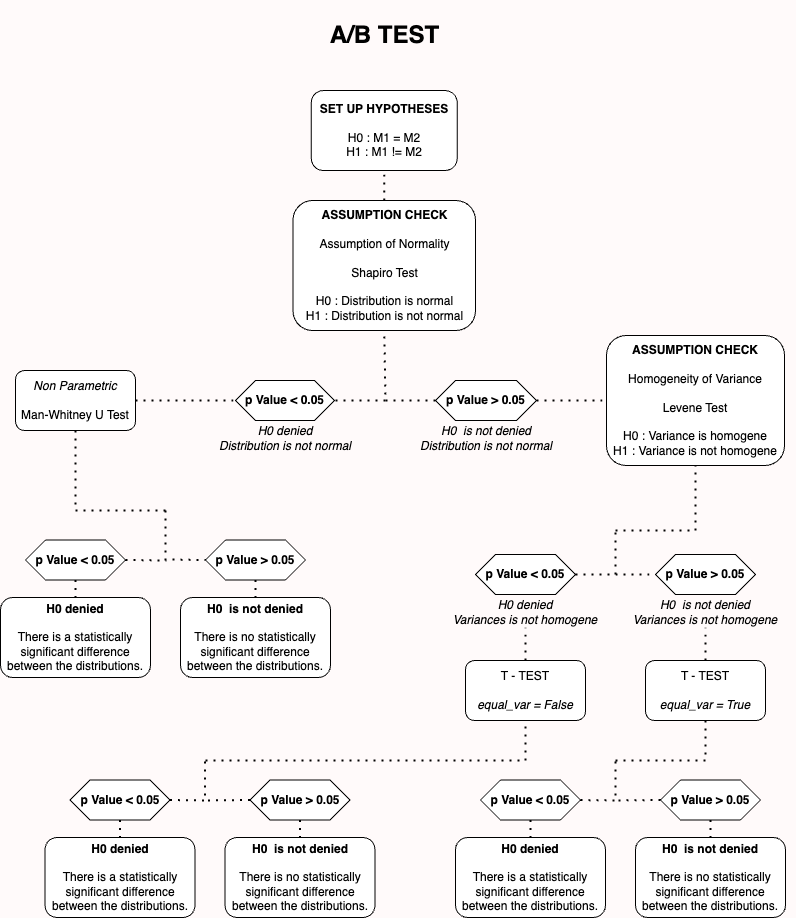

**Set up Hypotheses**

* H0: M1 = M2 (There is no statistically significant difference in the "Purchase" variables of the Control and Test groups.)
* H1: M1 != M2 (There is statistically significant difference in the "Purchase" variables of the Control and Test groups.)


**Assumption of Normality Check**

* H0: Normal distribution assumption is met.
* H1: Normal distribution assumption is not met.
---
* H0 denied if p-value < 0.05. 
* H0 cannot be denied if p-value is not < 0.05.

In [10]:
test_stat, pvalue = shapiro(control["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


p-value > 0.05 so Normal distriution assumption is met.

In [11]:
test_stat, pvalue = shapiro(test["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


p-value > 0.05 so Normal distriution assumption is met.


**Assumption of Variance Homogenity Check**

* H0: Variance homogenity assumption is met.
* H1: Variance homogenity assumption is not met.
---
* H0 denied if p-value < 0.05. 
* H0 cannot be denied if p-value is not < 0.05.

In [12]:
test_stat, pvalue = levene(control["Purchase"],
                           test["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


p-value > 0.05 so Variance homogenity assumption is met.

**Selection of Suitable Test**

In [13]:
test_stat, pvalue = ttest_ind(control["Purchase"],
                              test["Purchase"],
                              equal_var=True) 
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


p-value > 0.05 so H0 cannot be denied

* Both Sample distributions fit to normal distributions. Homogeneity of variances is being checked.
* Variances are Homogeneous. AB Test is being applied...
* AB test P value: 0.3493 >= 0.0500 alpha value. Accept H0. There is no statistically significant difference between the two groups.

**The obtained p-value of 0.3493 shows that there is no statistically significant difference between the purchasing averages of the control and test groups. In other words, there isn’t enough evidence to determine whether the average bid leads to more conversions than the maximum bid.**